In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# Import the dataset

path = r'C:\Users\Lapis Lazuli\Documents\Project 6\Data'
df = pd.read_pickle(os.path.join(path, 'Rent Prices.pkl'))

In [4]:
# Check the dataset

df.head(10)

,City Code,City,Metro,County,State,Population Rank,Month/Year,Rent Price
0,6181,New York,New York,Queens,NY,1,April 2012,1792
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,April 2012,2183
2,17426,Chicago,Chicago,Cook,IL,3,April 2012,1494
3,39051,Houston,Houston,Harris,TX,4,April 2012,1200
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,April 2012,1091
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,April 2012,1034
6,18959,Las Vegas,Las Vegas,Clark,NV,7,April 2012,1127
7,6915,San Antonio,San Antonio,Bexar,TX,8,April 2012,1045
8,54296,San Diego,San Diego,San Diego,CA,9,April 2012,2006
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,April 2012,1104


In [5]:
df.shape

(29000, 8)

### Elbow technique

In [6]:
# Only include numerical columns relevant to the analysis

numeric_cols = ['Population Rank', 'Rent Price']
df_numeric = df[numeric_cols]

In [7]:
num_cl = range(1, 10)    # define the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl]    # defines k-means clusters in the range above

In [8]:
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))]

score

[-9864418888.303518,
 -3568998997.0773616,
 -2221648788.137404,
 -1633273972.245449,
 -1262226126.2223706,
 -1075330563.3886802,
 -903643851.3596082,
 -790356377.7418212,
 -695007008.0461364]

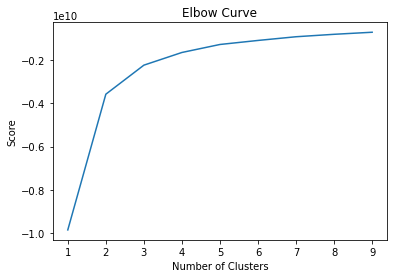

In [9]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The optimal count for clusters is three because that's where the curve starts to flatten out

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df_numeric)

C:\Users\Lapis Lazuli\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [25]:
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

C:\Users\Lapis Lazuli\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\LAPISL~1\AppData\Local\Temp/ipykernel_9568/1738728002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['clusters'] = kmeans.fit_predict(df_numeric)


In [26]:
df_numeric.head()

,Population Rank,Rent Price,clusters
0,1,1792,0
1,2,2183,2
2,3,1494,0
3,4,1200,1
4,5,1091,1


In [27]:
df_numeric['clusters'].value_counts()

1    15063
0     9143
2     4794
Name: clusters, dtype: int64

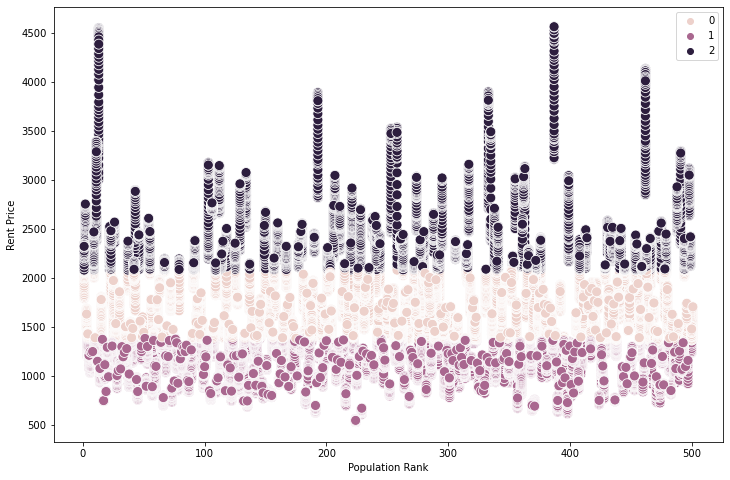

In [28]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['Population Rank'], y=df['Rent Price'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Population Rank')
plt.ylabel('Rent Price')
plt.show()

### Interestingly enough the clusters are divided into different ranges across the entire population rank: rent prices below 1500, between 1500-2000, and above 2000
### Perhaps this could be representative of the different kinds of rental markets within the cities, i.e. single family homes being more expensive than apartments, and condos having their own price range, etc.
### There is an absence of "clouds" of data centered around a single point, and it seems that the rent prices are dispersed within each cluster, and the prices are seemingly consistent across the population ranks
### Other factors such as amenities, economic factors, and supply and demand may also contribute to the segmentation

In [29]:
df_numeric.groupby('clusters').agg({'Population Rank':['mean', 'median'],
                                   'Rent Price':['mean', 'median']})

Population Rank          Rent Price        
                    mean median         mean  median
clusters                                            
0             271.730832  273.0  1667.306136  1645.0
1             235.480847  224.0  1081.734050  1108.0
2             262.196704  261.0  2494.716103  2383.0

### Cluster 2 contained the highest prices based on the mean and median within this group compared to the other clusters, with Cluster 1 having the lowest rent price
### There doesn't seem to be any discernable pattern within the population rank numbers however, which also reinforces the idea that the rent price ranges within each cluster are consistent across all the population ranks